In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.askpython.com/python/examples/backpropagation-in-python   #ejemplo

El algoritmo de backpropagation es un tipo de algoritmo de aprendizaje supervisado para redes neuronales artificiales donde ajustamos las funciones de peso y mejoramos la precisión del modelo. Use el método de descenso de gradiente para reducir la función de costo. Reduzca la distancia media cuadrática entre los datos predichos y los datos reales. Este tipo de algoritmo se usa a menudo para entrenar redes neuronales de avance para ciertos datos de clasificación conocida.

Ahora veamos cómo funciona realmente el algoritmo. Básicamente, hay tres capas en el modelo de propagación hacia atrás, a saber, la capa de entrada, la capa oculta y la capa de salida. Estos son los pasos principales del algoritmo:

- Paso 1: La capa de entrada recibe la entrada.
- Paso 2: Se promedian los valores de entrada.
- Paso 3: Cada capa oculta procesa el resultado. Cada salida se denomina aquí "error", que en realidad es la diferencia entre la salida real y la salida deseada.
- Paso 4: En este paso, el algoritmo vuelve a las capas ocultas para optimizar los pesos y minimizar el error.

Hay dos tipos principales de métodos de devolución de llamada de propagación: devolución de llamada estática y devolución de llamada iterativa. Veamos qué significa realmente cada uno de estos dos tipos. En retornos estáticos, las entradas estáticas producen salidas estáticas. Esto es particularmente útil para problemas de clasificación estática como el reconocimiento óptico de caracteres. Por otro lado, la propagación repetida tiene lugar hasta que alcanza un cierto valor o un umbral. Cuando alcanza un valor establecido, el error se propaga hacia atrás.


In [2]:
data = load_iris()
X=data.data
y=data.target
y = pd.get_dummies(y).values

In [3]:
#Tomar alguna parte de los datos para entrenar y la otra para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50, random_state=42)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [5]:
def algoritmo_sigmoid(X_train, y_train,learning_rate=0.1,iterations = 5000,input_size = 4,hidden_size = 2,output_size = 3):
    results = pd.DataFrame(columns=["mse", "accuracy"])
    n = y_train.size
    # initializing weight for the hidden layer
    w1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

    # initializing weight for the output layer
    w2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

    for itr in range(iterations):
        # feedforward propagation on hidden layer
        a1 = sigmoid(np.dot(X_train , w1))

        # on output layer
        a2 = sigmoid(np.dot(a1, w2))

        # Calculating error
        mse = mean_squared_error(a2, y_train)
        acc = accuracy(a2, y_train)

        results = pd.concat([results, pd.DataFrame([{"mse":mse, "accuracy":acc}])], ignore_index=True)
        # backpropagation
        e1 = a2 - y_train
        dW1 = e1 * a2 * (1 - a2)

        e2 = np.dot(dW1, w2.T)
        dW2 = e2 * a1 * (1 - a1)

        # weight updates
        W2_update = np.dot(a1.T, dW1) / n
        W1_update = np.dot(X_train.T, dW2) / n

        w2 = w2 - learning_rate * W2_update
        w1 = w1 - learning_rate * W1_update

    return results,mse,acc,w1,w2

In [9]:
results1,mse1,acc1,w1,w2 = algoritmo_sigmoid(X_train, y_train)

C:\Users\leona\AppData\Local\Temp\ipykernel_12416\1408549313.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"mse":mse, "accuracy":acc}])], ignore_index=True)


Text(0.5, 1.0, 'Accuracy X N# iterations ')

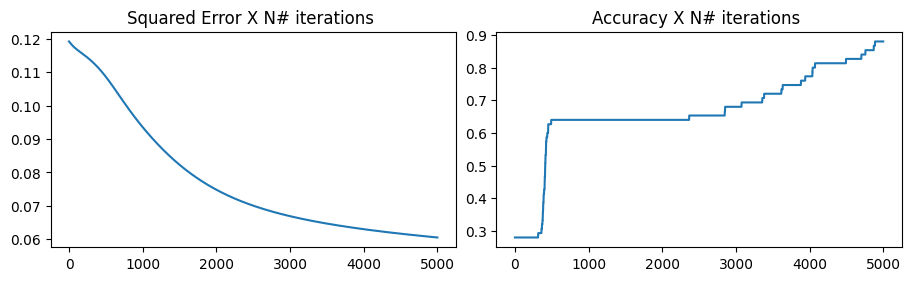

In [10]:
fig, axs = plt.subplots(1, 2, layout='constrained',figsize=(9, 2.7))
axs[0].plot(results1.mse)
axs[0].set_title('Squared Error X N# iterations ')
axs[1].plot(results1.accuracy)
axs[1].set_title('Accuracy X N# iterations ')

In [11]:
a1 = sigmoid(np.dot(X_test, w1))
a2 = sigmoid(np.dot(a1, w2))
acc = accuracy(a2, y_test)
print(f'Accuracy {acc}')

Accuracy 0.92
